In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
### LINEAR REGRESSION ###

In [3]:
## The normal equation ##

In [54]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # randn - Gaussian noise

Saving figure generated_data_plot


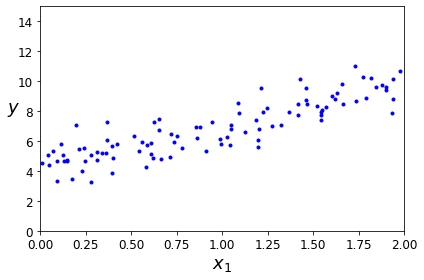

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [6]:
# Now let’s compute theta_best (theta_hat) using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
# Now, we can make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


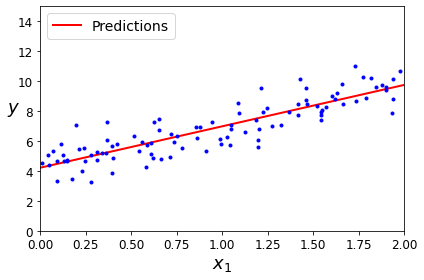

In [9]:
# Let’s plot this model’s predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [10]:
# Let's try using the scikit-learn Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept is the expected mean value of Y when all X=0 (theta_0)

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [13]:
# Pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [14]:
## Computational Complexity ##

In [15]:
## Gradient Descent ##

In [16]:
# Batch Gradient Descent (uses the full training set) #

In [79]:
# Simple implementation of the algorithm
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

ValueError: operands could not be broadcast together with shapes (100,1) (20,1) 

In [18]:
theta
# The same as Normal Equation and LinearRegression model (using SVD)

array([[4.21509616],
       [2.77011339]])

In [19]:
# Let's change the learning rate
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


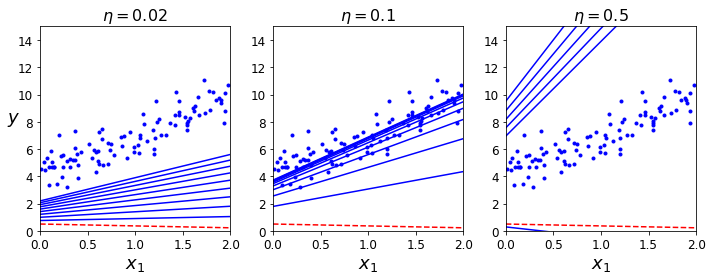

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [21]:
# Stochastic Gradient Descent #
# Picks a random instance from the training set at every step and
# computes the gradients based only on that single instance

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


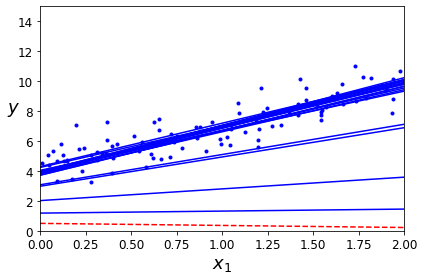

In [23]:
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # Random initialization

for epoch in range(n_epochs): # For each round (epoch)
    for i in range(m): # For each iteration
        if epoch == 0 and i < 20: # Plot first 20 steps of training
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

In [24]:
theta

array([[4.21076011],
       [2.74856079]])

In [25]:
# Perform Linear Regression using SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.flatten())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

In [27]:
# Mini-batch Gradient Descent #
# Computes the gradients on small random sets of instances called mini-batches

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # Random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i : i+minibatch_size]
        yi = y_shuffled[i : i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        
        theta_path_mgd.append(theta)

In [29]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [30]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


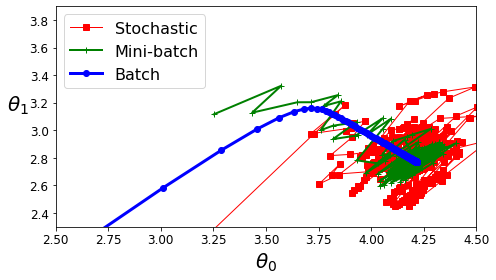

In [31]:
plt.figure(figsize=(7,4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend(loc="upper left", fontsize=16)

plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)

plt.axis([2.5, 4.5, 2.3, 3.9])

save_fig("gradient_descent_paths_plot")

plt.show()

In [32]:
### POLYNOMIAL REGRESSION ###

In [33]:
# Let's generate some non-linear data, based on a simple quadratic equation
import numpy as np
np.random.seed(42)

In [34]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # np.random.randn(m, 1) = gaussian noise

Saving figure quadratic_data_plot


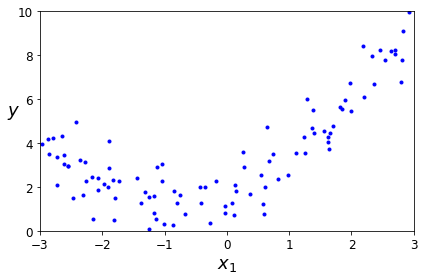

In [35]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Let's add to our training data the square of each feature in the training set as new features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]

array([-0.75275929])

In [37]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [38]:
# X_poly now contains the original feature of X plus the square of this feature
# Now we can fit a LinearRegression model to this extended training data

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# The model estimates y_pred (y_hat) = 0.56*x^2 + 0.93*x + 1.78
# The original function was y = 0.5*x^2 + 1.0*x + 2.0 + gaussian_noise

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


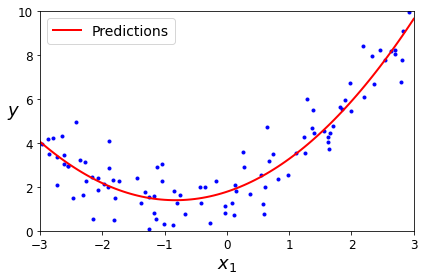

In [41]:
# Let's plot the predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)

plt.axis([-3, 3, 0, 10])

save_fig("quadratic_predictions_plot")

plt.show()

Saving figure high_degree_polynomials_plot


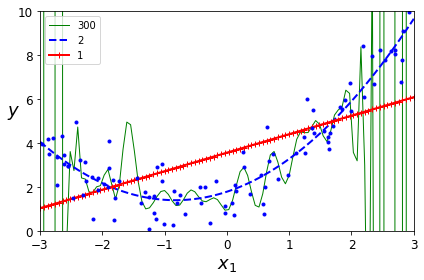

In [43]:
# Let's compare some degrees (1, 2, 300) of polynomial models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [46]:
# In general you won’t know what function generated the data, so how can you decide how complex your model should be?
# How can you tell that your model is overfitting or underfitting the data?

In [120]:
# In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance

# If a model performs well on the training data but generalizes poorly
# according to the cross-validation metrics, then your model is overfitting.

# If it performs poorly on both, then it is underfitting.
# This is one way to tell when a model is too simple or too complex.

# Another way is to look at the learning curves.

In [45]:
### LEARNING CURVES ###

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# X, y - from the plain linear regression model (a straight line)
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    # Select a sized subset from the training set (1 instances, 2 instances,..., until all instances)
    for m in range(1, len(X_train) + 1):
        # Fit the model on that subset
        model.fit(X_train[:m], y_train[:m])
        
        # Predict on the training subset
        y_train_predict = model.predict(X_train[:m])
        
        # Predict on the validation subset
        y_val_predict = model.predict(X_val)
        
        # Save the train and validation errors
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot the results
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    plt.legend(loc="upper right", fontsize=14)
    
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Saving figure underfitting_learning_curves_plot


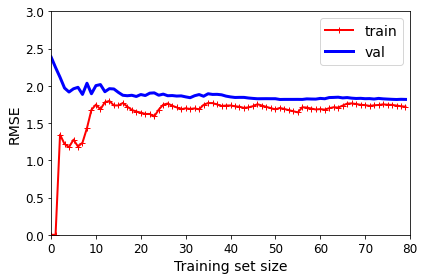

In [49]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.axis([0, 80, 0, 3])
save_fig("underfitting_learning_curves_plot")
plt.show()      

Saving figure learning_curves_plot


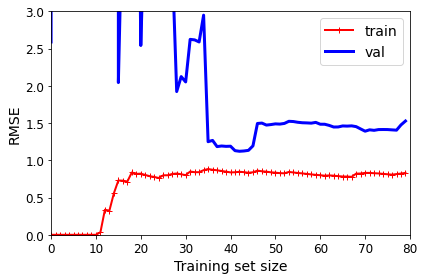

In [55]:
# Now let’s look at the learning curves of a 10th-degree polynomial model on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])
save_fig("learning_curves_plot")
plt.show()   

In [56]:
### REGULARIZED LINEAR MODELS ###

In [57]:
# We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
# which implement three different ways to constrain the weights. (all 3 are regularized versions of Linear Regression)

# All 3 are improved Linear Regression models

In [58]:
## Ridge Regression ##

In [59]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [60]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [61]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [68]:
# SGDRegressor with penalty l2 = Ridge
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

Saving figure ridge_regression_plot


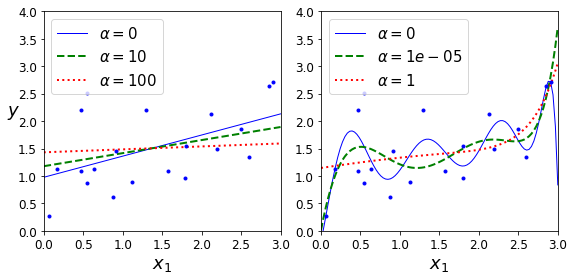

In [67]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [69]:
## Lasso Regression ##

# Lasso Regression it tends to completely eliminate the weights 
# of the least important features (i.e., set them to zero).

# Lasso Regression automatically performs feature selection and outputs a
# sparse model (i.e., with few nonzero feature weights).

F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


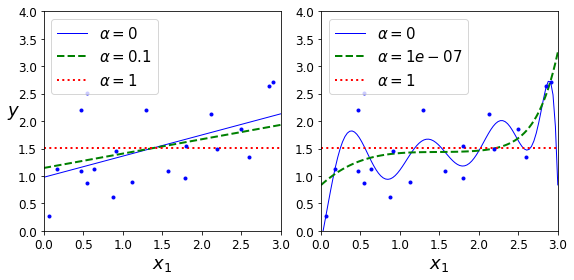

In [70]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [74]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [72]:
# SGDRegressor with penalty l1 = Lasso
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

In [73]:
## Elastic Net ##

# Elastic Net is a mix between Ridge Regression and Lasso Regression

In [75]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [76]:
## Early Stopping ##

# A very different way to regularize iterative learning algorithms such as Gradient
# Descent is to stop training as soon as the validation error reaches a minimum.

# This is called early stopping.

In [80]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [82]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True for continuing the training where it left off instead of restarting from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    # save the best state (model + epoch)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Saving figure early_stopping_plot


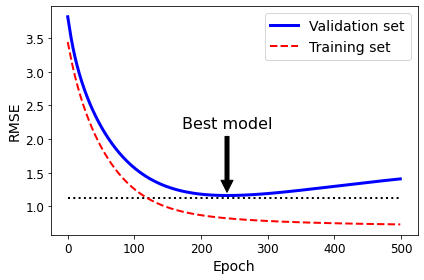

In [88]:
# Create the graph
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [91]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [89]:
### LOGISTIC REGRESSION ###

In [90]:
## Estimating Probabilities ##

In [92]:
## Training and Cost Function ##

In [93]:
## Decision Boundaries ##

# Let’s use the iris dataset to illustrate Logistic Regression

Saving figure logistic_function_plot


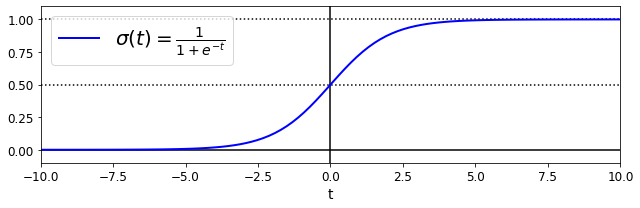

In [94]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))

plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [95]:
# Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature

# First let's load the data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [96]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [97]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

<ipython-input-97-47a2338d9a7c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0


In [98]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

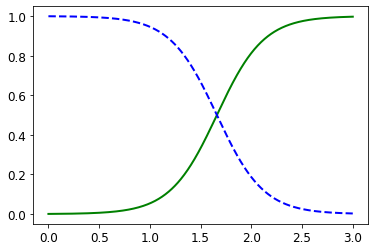

In [102]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\matplotlib\patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


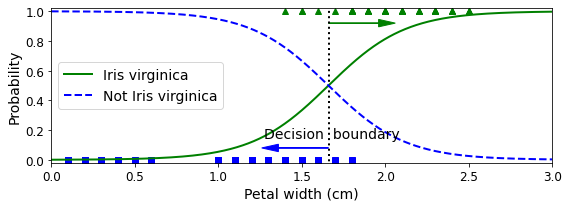

In [103]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [104]:
decision_boundary

array([1.66066066])

In [110]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

<ipython-input-111-1a12a15f0956>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


Saving figure logistic_regression_contour_plot


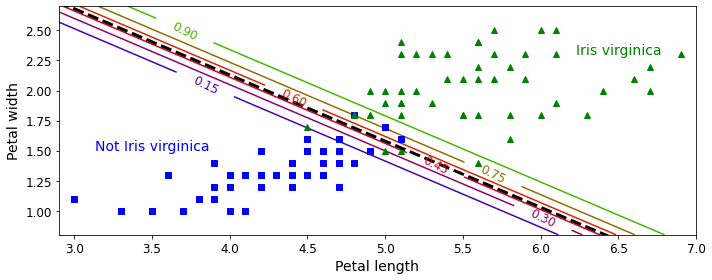

In [111]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [114]:
## Softmax Regression (Multinomial Logistic Regression) ##

In [112]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Saving figure softmax_regression_contour_plot


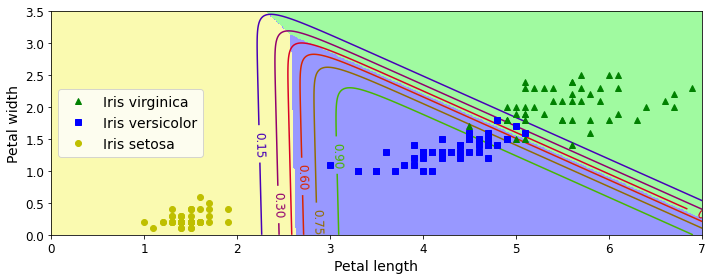

In [118]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [115]:
softmax_reg.predict([[5, 2]])

array([2])

In [116]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [119]:
### EXERCISES ###

In [121]:
# 1. Which Linear Regression training algorithm can you use if you have a training set with millions of features?

# Using the Normal Equation, we need to compute the inverse of X.T.dot(X), which is an (n+1)x(n+1) matrix (n = no of features)
# The comuptational complexity of inverting such a matrix is about O(n^2.4) to O(n^3) (depending on the implementation)

# Both the Normal Equation and the SVD approach get very slow when the number of features grows large

# Thus, we can use Gradient Descent

In [122]:
# 2. Suppose the features in your training set have very different scales. 
# What algorithms might suffer from this, and how? What can you do about it?

# The Gradient Descent suffers from features with different scales.
# We should scale all the features to eliminate this problem.

In [123]:
# 3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

# Since the Logistic Regression model cost function is convex, there is no local minimum (only global minimum)

In [124]:
# 4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

# No. If the learning rate is too high, then the model can diverge.
# It can also only reach the local minimum based on where the initialization is.

In [125]:
# 5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch.
# If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

# If the training error also goes up, that is the indication of diverging.
#     You can fix that by lowering the learning rate and then re-training.
# If the training error is not increasing, then your model is overfitting.
#     You can fix that by re-training with a different model.

In [126]:
# 6. Is it a good idea to stop Mini-Batch Gradient Descent immediately when the validation error goes up?

# No, because mini-batch is irregular in approaching the minimum (just like Stochastic Gradient Descent, but to less degree).
# You can always revert to the best case if the error does not improve for a while.

In [127]:
# 7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest?
# Which will actually converge? How can you make the others converge as well?

# The Stochastic Gradient Descent will reach the fastest since it is using one random training instance at each iteration.
# However, the Batch Gradient Descent is the only one to actually converge.
# You cannot make the others converge; they will only approach close to the global minimum.

In [128]:
# 8. Suppose you are using Polynomial Regression. 
# You plot the learning curves and you notice that there is a large gap between the training error and the validation error.
# What is happening? What are three ways to solve this?

# The gap means that the model performs significantly better on the training data than on the validation data
# To solve this:
# v1) Increase the training set
# v2) Regularize the model
# v3) Reduce the complexity of the model (degree of freedom)

In [129]:
# 9. Suppose you are using Ridge Regression and you notice that the training error
# and the validation error are almost equal and fairly high.
# Would you say that the model suffers from high bias or high variance?
# Should you increase the regularization hyperparameter alpha or reduce it?

# The model suffers from high bias, because the errors are both high, indicating wrong assumptions and therefore underfitting.
# In order to reduce high bias, you have to decrease alpha.

In [130]:
# 10. Why would you want to use:

# • Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
#   Ridge Regression regularizes the Linear Regression, to avoid overfitting.

# • Lasso instead of Ridge Regression?
#   Lasso, which uses L1 norm regularization, automatically eliminates the weights of the least important features
#   and therefore performs feature selection.

# • Elastic Net instead of Lasso?
#   Elastic Net is preferred over Lasso if there are lots of features or lots of strongly correlated features.
#   Elastic Net is a mix of Ridge and Lasso

In [131]:
# 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.
# Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

# You should implement two Logistic Regression classifiers, because there are 
# two different binary classifying (outdoor vs indoor, daytime vs nighttime). All pictures can be one from each classifier.
# Softmax Regression classifies into only one class out of all of them (Softmax doesn't support multi-label classification).

In [132]:
# 12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

In [133]:
# Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [134]:
# We need to add the bias term for every instance (x0 = 1)
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [135]:
np.random.seed(2042)

In [136]:
# The easiest option to split the dataset into a training set, a validation set and a test set
# would be to use Scikit-Learn's train_test_split() function, but the point of this exercise is
# to try understand the algorithms by implementing them manually. So here is one possible implementation:

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [138]:
# The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train 
# the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes 
# except for the target class which will have a probability of 1.0 
# (in other words, the vector of class probabilities for any given instance is a one-hot vector).

# Let's write a small function to convert the vector of class indices into a matrix
# containing a one-hot vector for each instance:

def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [139]:
# Let's test this function on the first 10 instances
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [140]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [141]:
# Looks good, so let's create the target class probabilities matrix for the training set and the test set
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [142]:
# Now let's implement the Softmax function

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [143]:
# We are almost ready to start training. Let's define the number of inputs and outputs
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train)) # == 3 (3 iris classes)

In [151]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    if iteration % 500 == 0:
        # Cross entropy cost (loss) function
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
        
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 1.7386170568410733
500 0.8488629197906948
1000 0.703472475061984
1500 0.6150804843178816
2000 0.5559164860294692
2500 0.5130216310386663
3000 0.480047305047098
3500 0.4536071191873922
4000 0.4317394299062136
4500 0.4132247579146816
5000 0.39725974285855603


In [153]:
# And that's it! The Softmax model is trained. Let's look at the model parameters
Theta

array([[ 3.99684968,  0.33674138, -2.42199967],
       [-0.17781294,  0.79800955,  1.04236421],
       [-1.25238225,  0.10026457,  1.15960747]])

In [154]:
# Let's make predictions for the validation set and check the accuracy score
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [155]:
# Well, this model looks pretty good. For the sake of the exercise, let's add a bit of 
# regularization. The following training code is similar to the one above,
# but the loss now has an additional penalty, and the gradients have the proper additional term 
# (note that we don't regularize the first element of Theta since this corresponds to the bias term).
# Also, let's try increasing the learning rate eta.

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
        
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.499703253536928
500 0.529078292249441
1000 0.502572258508694
1500 0.4943081558037033
2000 0.4911435423197204
2500 0.48983423724286096
3000 0.48927068509698635
3500 0.4890225235251444
4000 0.4889117050943981
4500 0.48886177617002735
5000 0.4888391504649974


In [156]:
# Because of the additional penalty, the loss seems greater than earlier, but perhaps this model will perform better?
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [157]:
# Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

# Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration
# and stop when the error starts growing.

eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
        
    # Eearly stop
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.640033660350405
500 0.5603771552870109
1000 0.5401925361936724
1500 0.5345447783544128
2000 0.5329082107725354
2500 0.5325545024066124
2614 0.5325466937764207
2615 0.5325466948333359 early stopping!


In [158]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

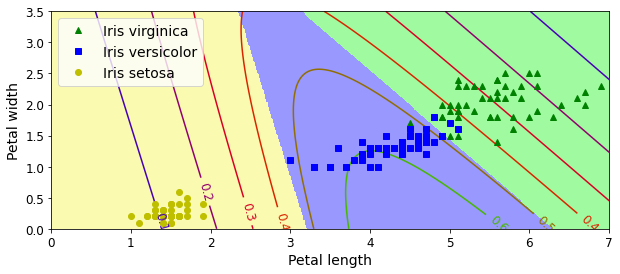

In [159]:
# Still perfect, but faster.

# Now let's plot the model's predictions on the whole dataset

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [160]:
# And now let's measure the final model's accuracy on the test set

logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333